Importing the dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST Data from keras.datasets

In [2]:
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
# shape of numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image Dimension -> 28x28
Grayscale image -> 1 channel

In [5]:
print(X_train[9].shape)

(28, 28)


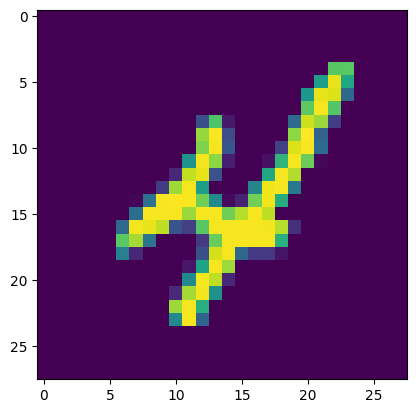

4


In [6]:
# displaying the image
plt.imshow(X_train[9])
plt.show()

# corresponding label
print(Y_train[9])

Image Lables

In [7]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_train
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [8]:
# normalizing the values from 0-255 to 0-1 (0 black, 1 white)

X_train = X_train/255
X_test = X_test/255


Building the neural network

In [9]:
# setting up the layers of the neural network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(50, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')

])

In [10]:
# compiling the neural network

model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
#training the neural network

model.fit(X_train, Y_train, epochs =10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.3005 - accuracy: 0.9123
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1408 - accuracy: 0.9574
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1040 - accuracy: 0.9683
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0843 - accuracy: 0.9740
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0704 - accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0605 - accuracy: 0.9807
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0514 - accuracy: 0.9836
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0452 - accuracy: 0.9857
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0395 - accuracy: 0.9871
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.034

Training data accuracy  = 93.5%

**Accuracy on Test data**

In [12]:
loss,accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1039 - accuracy: 0.9732
0.9732000231742859


Test Data Accuracy = 97.3%

<function matplotlib.pyplot.show(close=None, block=None)>

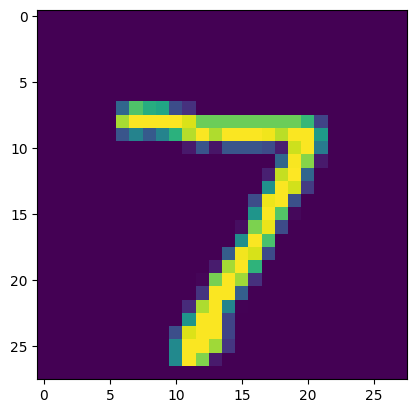

In [13]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show

In [14]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
# converting the probabilities to labels

Y_pred_label = [np.argmax(i) for i in Y_pred]
print(Y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True Labels

Y_pred --> Predicted labels

Confusion Matrix

In [16]:
conf_mat = confusion_matrix(Y_test, Y_pred_label)

Text(0.5, 47.7222222222222, 'Predicted Labels')

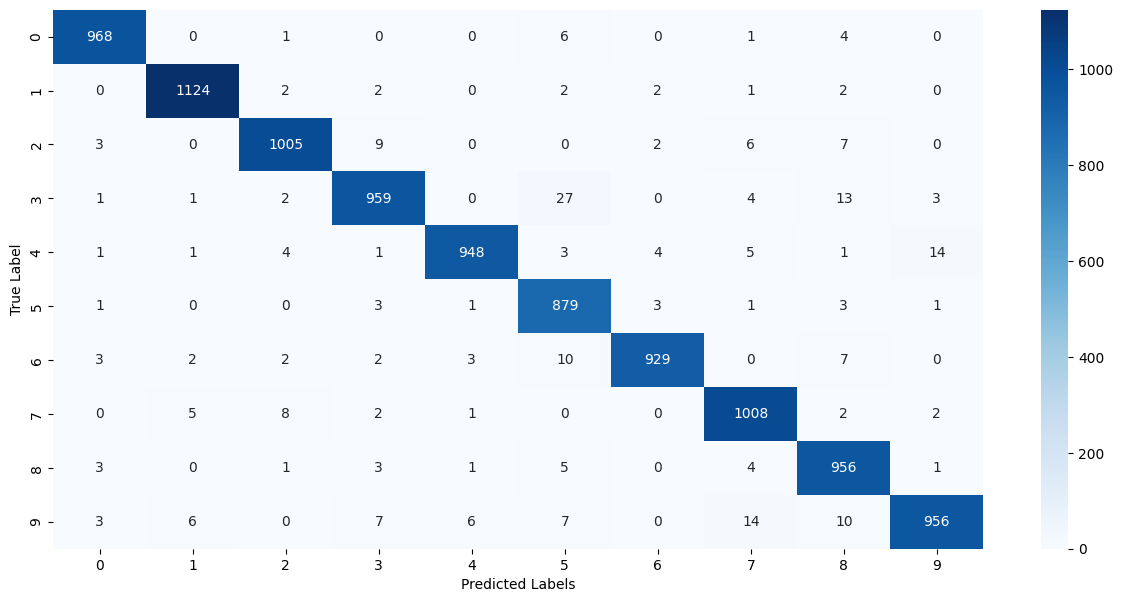

In [17]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Labels')

**Predictive System**

Path of the image to be predicted: /content/sample.png


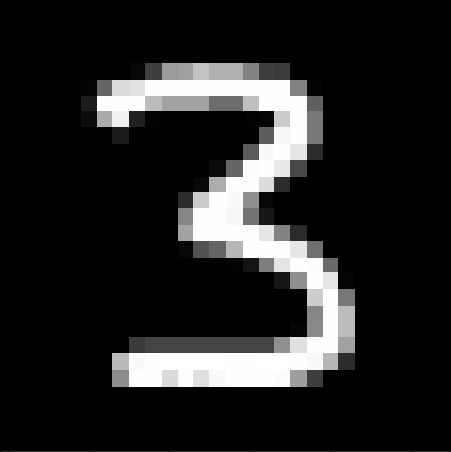

1/1 [==============================] - 0s 68ms/step
[[1.1139074e-07 2.5858074e-02 1.1975045e-03 9.9999964e-01 7.5594739e-09
  6.4950667e-02 5.4017023e-15 4.5559712e-09 7.6063776e-01 2.1413567e-04]]
The Handwritten Digit is recognised at  3


In [20]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28,28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])


input_prediction = model.predict(image_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised at ', input_pred_label)